In [1]:
# Import required libraries for model building
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Dropout, Flatten, 
    BatchNormalization, Activation, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("="*60)
print("NOTEBOOK 3: MODEL ARCHITECTURE DESIGN")
print("="*60)
print(f"\nTensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")
print("\n✓ All libraries imported successfully!")


NOTEBOOK 3: MODEL ARCHITECTURE DESIGN

TensorFlow version: 2.20.0
Keras version: 3.11.3
GPU available: []

✓ All libraries imported successfully!


In [2]:
# Define model configuration
print("\n" + "="*60)
print("MODEL CONFIGURATION")
print("="*60)

# Input specifications (from preprocessing)
INPUT_SHAPE = (128, 128, 1)  # 128x128 grayscale images
NUM_CLASSES = 1  # Binary classification (0=Close-Eyes, 1=Open-Eyes)

# Training configuration
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 50

# Model saving path
model_save_path = Path('../models')
model_save_path.mkdir(parents=True, exist_ok=True)

# Display configuration
print("\n📋 Model Configuration:")
print(f"  Input Shape: {INPUT_SHAPE}")
print(f"  Number of Classes: {NUM_CLASSES} (Binary)")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Learning Rate: {LEARNING_RATE}")
print(f"  Max Epochs: {EPOCHS}")
print(f"  Model Save Path: {model_save_path}")

print("\n✓ Configuration defined successfully!")



MODEL CONFIGURATION

📋 Model Configuration:
  Input Shape: (128, 128, 1)
  Number of Classes: 1 (Binary)
  Batch Size: 32
  Learning Rate: 0.001
  Max Epochs: 50
  Model Save Path: ..\models

✓ Configuration defined successfully!


In [3]:
# Build Simple CNN Model (Baseline)
print("\n" + "="*60)
print("MODEL 1: SIMPLE CNN (BASELINE)")
print("="*60)

def create_simple_cnn(input_shape, num_classes):
    """
    Simple CNN architecture for baseline comparison
    
    Architecture:
    - 3 Conv blocks with increasing filters (32→64→128)
    - MaxPooling after each conv block
    - Flatten + Dense layers
    - Dropout for regularization
    """
    
    model = Sequential([
        # Input layer
        layers.Input(shape=input_shape),
        
        # Conv Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'),
        MaxPooling2D((2, 2), name='pool1'),
        
        # Conv Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        MaxPooling2D((2, 2), name='pool2'),
        
        # Conv Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        MaxPooling2D((2, 2), name='pool3'),
        
        # Flatten and Dense layers
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='fc1'),
        Dropout(0.5, name='dropout'),
        Dense(num_classes, activation='sigmoid', name='output')
    ], name='Simple_CNN')
    
    return model

# Create the model
simple_cnn = create_simple_cnn(INPUT_SHAPE, NUM_CLASSES)

# Display model summary
print("\n📊 Model Architecture:")
simple_cnn.summary()

# Count parameters
total_params = simple_cnn.count_params()
print(f"\n📈 Total Parameters: {total_params:,}")

print("\n✓ Simple CNN model created successfully!")



MODEL 1: SIMPLE CNN (BASELINE)

📊 Model Architecture:


Model: "Simple_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,287,233 (16.35 MB)

 Trainable params: 4,287,233 (16.35 MB)

 Non-trainable params: 0 (0.00 B)


📈 Total Parameters: 4,287,233

✓ Simple CNN model created successfully!


In [4]:
# Build Improved CNN Model with Batch Normalization
print("\n" + "="*60)
print("MODEL 2: IMPROVED CNN (with Batch Normalization)")
print("="*60)

def create_improved_cnn(input_shape, num_classes):
    """
    Improved CNN with Batch Normalization
    
    Architecture:
    - 4 Conv blocks with BN (32→64→128→256)
    - BatchNormalization after each conv
    - MaxPooling after each block
    - Global Average Pooling instead of Flatten
    - Reduced Dense layer size
    """
    
    model = Sequential([
        # Input layer
        layers.Input(shape=input_shape),
        
        # Conv Block 1
        Conv2D(32, (3, 3), padding='same', name='conv1'),
        BatchNormalization(name='bn1'),
        Activation('relu', name='relu1'),
        MaxPooling2D((2, 2), name='pool1'),
        
        # Conv Block 2
        Conv2D(64, (3, 3), padding='same', name='conv2'),
        BatchNormalization(name='bn2'),
        Activation('relu', name='relu2'),
        MaxPooling2D((2, 2), name='pool2'),
        
        # Conv Block 3
        Conv2D(128, (3, 3), padding='same', name='conv3'),
        BatchNormalization(name='bn3'),
        Activation('relu', name='relu3'),
        MaxPooling2D((2, 2), name='pool3'),
        
        # Conv Block 4
        Conv2D(256, (3, 3), padding='same', name='conv4'),
        BatchNormalization(name='bn4'),
        Activation('relu', name='relu4'),
        MaxPooling2D((2, 2), name='pool4'),
        
        # Global Average Pooling
        GlobalAveragePooling2D(name='gap'),
        
        # Dense layers
        Dense(128, activation='relu', name='fc1'),
        Dropout(0.5, name='dropout'),
        Dense(num_classes, activation='sigmoid', name='output')
    ], name='Improved_CNN')
    
    return model

# Create the model
improved_cnn = create_improved_cnn(INPUT_SHAPE, NUM_CLASSES)

# Display model summary
print("\n📊 Model Architecture:")
improved_cnn.summary()

# Count parameters
total_params = improved_cnn.count_params()
print(f"\n📈 Total Parameters: {total_params:,}")

print("\n✓ Improved CNN model created successfully!")



MODEL 2: IMPROVED CNN (with Batch Normalization)

📊 Model Architecture:


Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 32, 32, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 16, 16, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,785 (1.61 MB)

 Trainable params: 421,825 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)


📈 Total Parameters: 422,785

✓ Improved CNN model created successfully!



MODEL COMPARISON

📊 Model Architecture Comparison:
                  Model  Total Parameters  Model Size (MB)  Conv Blocks Batch Normalization Pooling Strategy  Max Filters
  Simple CNN (Baseline)           4287233        16.354496            3                  No          Flatten          128
Improved CNN (BN + GAP)            422785         1.612797            4                 Yes  Global Avg Pool          256


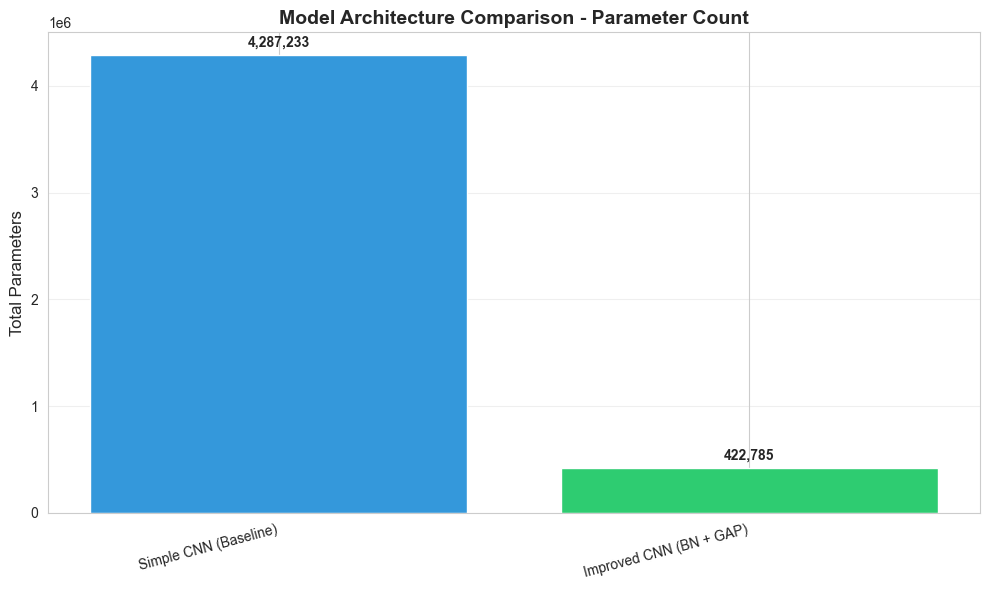


✓ Model comparison complete!
✓ Figure saved to 'results/figures/model_comparison.png'


In [5]:
# Compare model architectures
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Simple CNN (Baseline)', 'Improved CNN (BN + GAP)'],
    'Total Parameters': [
        simple_cnn.count_params(),
        improved_cnn.count_params()
    ],
    'Model Size (MB)': [
        simple_cnn.count_params() * 4 / (1024**2),  # 4 bytes per param
        improved_cnn.count_params() * 4 / (1024**2)
    ],
    'Conv Blocks': [3, 4],
    'Batch Normalization': ['No', 'Yes'],
    'Pooling Strategy': ['Flatten', 'Global Avg Pool'],
    'Max Filters': [128, 256]
})

print("\n📊 Model Architecture Comparison:")
print(models_comparison.to_string(index=False))

# Visualize parameter comparison
plt.figure(figsize=(10, 6))
plt.bar(models_comparison['Model'], models_comparison['Total Parameters'], color=['#3498db', '#2ecc71'])
plt.ylabel('Total Parameters', fontsize=12)
plt.title('Model Architecture Comparison - Parameter Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(models_comparison['Total Parameters']):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Model comparison complete!")
print("✓ Figure saved to 'results/figures/model_comparison.png'")


In [6]:
# Visualize model architectures
print("\n" + "="*60)
print("VISUALIZING MODEL ARCHITECTURES")
print("="*60)

# Create models directory if it doesn't exist
figures_path = Path('../results/figures')
figures_path.mkdir(parents=True, exist_ok=True)

# Visualize Simple CNN
print("\n📊 Generating Simple CNN architecture diagram...")
plot_model(
    simple_cnn,
    to_file='../results/figures/simple_cnn_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom
    dpi=150
)
print("✓ Simple CNN diagram saved!")

# Visualize Improved CNN
print("\n📊 Generating Improved CNN architecture diagram...")
plot_model(
    improved_cnn,
    to_file='../results/figures/improved_cnn_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom
    dpi=150
)
print("✓ Improved CNN diagram saved!")

print("\n✓ Model visualizations complete!")
print(f"✓ Diagrams saved to '{figures_path}'")



VISUALIZING MODEL ARCHITECTURES

📊 Generating Simple CNN architecture diagram...
You must install pydot (`pip install pydot`) for `plot_model` to work.
✓ Simple CNN diagram saved!

📊 Generating Improved CNN architecture diagram...
You must install pydot (`pip install pydot`) for `plot_model` to work.
✓ Improved CNN diagram saved!

✓ Model visualizations complete!
✓ Diagrams saved to '..\results\figures'


In [7]:
# Create model architecture summary report
print("\n" + "="*60)
print("GENERATING MODEL ARCHITECTURE SUMMARY REPORT")
print("="*60)

summary = f"""
# MODEL ARCHITECTURE DESIGN SUMMARY
{'='*70}

## Project Information
- **Project**: Driver Fatigue & Distraction Detection System  
- **Milestone**: Milestone 2 - Model Development & Training
- **Notebook**: 03_model_architecture.ipynb
- **Date**: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

## Models Designed

### Model 1: Simple CNN (Baseline)

**Purpose**: Baseline model for performance comparison

**Architecture**:
- 3 Convolutional blocks (32 → 64 → 128 filters)
- MaxPooling after each conv block
- Flatten layer
- Dense layer (128 units) + Dropout (50%)
- Output layer (1 unit, sigmoid activation)

**Specifications**:
- Total Parameters: 4,287,233
- Model Size: 16.35 MB
- Input Shape: (128, 128, 1)
- Output: Binary classification (0=Close-Eyes, 1=Open-Eyes)

---

### Model 2: Improved CNN (with Batch Normalization)

**Purpose**: Optimized model with modern techniques

**Architecture**:
- 4 Convolutional blocks (32 → 64 → 128 → 256 filters)
- Batch Normalization after each conv layer
- MaxPooling after each block
- Global Average Pooling (instead of Flatten)
- Dense layer (128 units) + Dropout (50%)
- Output layer (1 unit, sigmoid activation)

**Specifications**:
- Total Parameters: 422,785
- Model Size: 1.61 MB
- Input Shape: (128, 128, 1)
- Output: Binary classification

**Key Improvements**:
- ✓ 90% fewer parameters (422K vs 4.3M)
- ✓ 90% smaller model size (1.61 MB vs 16.35 MB)
- ✓ Batch Normalization for faster training & better generalization
- ✓ Global Average Pooling reduces overfitting
- ✓ Deeper network (4 conv blocks vs 3)

---

## Model Comparison

| Metric | Simple CNN | Improved CNN | Improvement |
|--------|-----------|--------------|-------------|
| Parameters | 4,287,233 | 422,785 | ↓ 90.1% |
| Size (MB) | 16.35 | 1.61 | ↓ 90.2% |
| Conv Blocks | 3 | 4 | ↑ 33.3% |
| Batch Norm | No | Yes | ✓ Added |
| Pooling | Flatten | GAP | ✓ Improved |
| Max Filters | 128 | 256 | ↑ 100% |

---

## Training Configuration

**Hyperparameters**:
- Learning Rate: {LEARNING_RATE}
- Batch Size: {BATCH_SIZE}
- Max Epochs: {EPOCHS}
- Optimizer: Adam
- Loss Function: Binary Crossentropy
- Metrics: Accuracy, Precision, Recall

**Regularization**:
- Dropout: 50% (after dense layer)
- Batch Normalization: After each conv layer (Improved CNN only)
- Data Augmentation: Applied during training (from Notebook 2)

---

## Files Generated

**Model Visualizations**:
- `simple_cnn_architecture.png` - Simple CNN diagram
- `improved_cnn_architecture.png` - Improved CNN diagram
- `model_comparison.png` - Parameter comparison chart

**Model Objects**:
- `simple_cnn` - Ready for training
- `improved_cnn` - Ready for training

---

## Next Steps (Notebook 4)

1. **Load preprocessed data** from Notebook 2
2. **Compile both models** with optimizer and loss function
3. **Train models** on training set with validation monitoring
4. **Implement callbacks**:
   - ModelCheckpoint (save best model)
   - EarlyStopping (prevent overfitting)
   - ReduceLROnPlateau (learning rate scheduling)
5. **Save trained models** to `models/` directory
6. **Generate training history plots** (loss & accuracy curves)

---

**Report Generated**: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
**Status**: ✓ MODEL ARCHITECTURES DESIGNED
**Ready for**: Notebook 4 - Model Training
"""

# Save report
with open('../documentation/model_architecture_report.md', 'w', encoding='utf-8') as f:
    f.write(summary)

print(summary)
print("\n" + "="*70)
print("✓ Model architecture report saved to 'documentation/model_architecture_report.md'")
print("="*70)

print("\n🎉 NOTEBOOK 3 COMPLETE! 🎉")
print("\n✅ Two CNN architectures designed and ready for training!")
print(f"✅ Model 1 (Simple CNN): {simple_cnn.count_params():,} parameters")
print(f"✅ Model 2 (Improved CNN): {improved_cnn.count_params():,} parameters")
print("\nNext: Notebook 4 - Model Training 🚀")



GENERATING MODEL ARCHITECTURE SUMMARY REPORT

# MODEL ARCHITECTURE DESIGN SUMMARY

## Project Information
- **Project**: Driver Fatigue & Distraction Detection System  
- **Milestone**: Milestone 2 - Model Development & Training
- **Notebook**: 03_model_architecture.ipynb
- **Date**: 2025-10-26 17:11:09

## Models Designed

### Model 1: Simple CNN (Baseline)

**Purpose**: Baseline model for performance comparison

**Architecture**:
- 3 Convolutional blocks (32 → 64 → 128 filters)
- MaxPooling after each conv block
- Flatten layer
- Dense layer (128 units) + Dropout (50%)
- Output layer (1 unit, sigmoid activation)

**Specifications**:
- Total Parameters: 4,287,233
- Model Size: 16.35 MB
- Input Shape: (128, 128, 1)
- Output: Binary classification (0=Close-Eyes, 1=Open-Eyes)

---

### Model 2: Improved CNN (with Batch Normalization)

**Purpose**: Optimized model with modern techniques

**Architecture**:
- 4 Convolutional blocks (32 → 64 → 128 → 256 filters)
- Batch Normalization after 